A notebook to look at the Guf of St. Lawrence outputs converted from RPN to netcdf.

In [1]:
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%matplotlib inline

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
files2D = glob.glob('/home/soontiensn/data/gpsc-work2/OceanNavigator/dfo/OceanNavigator/Gulf/archive/data/*2D.nc')
files3D = glob.glob('/home/soontiensn/data/gpsc-work2/OceanNavigator/dfo/OceanNavigator/Gulf/archive/data/*3D.nc')
files2D.sort()
files3D.sort()

# 2D files
Examine 2D files first

In [3]:
d2D = xr.open_mfdataset(files2D)
d2D

<xarray.Dataset>
Dimensions:       (time_counter: 7, x: 149, y: 236)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2018-01-01 ... 2018-01-01T06:00:00
    nav_lat       (y, x) float32 dask.array<shape=(236, 149), chunksize=(236, 149)>
    nav_lon       (y, x) float32 dask.array<shape=(236, 149), chunksize=(236, 149)>
Dimensions without coordinates: x, y
Data variables:
    iiceconc      (time_counter, y, x) float32 dask.array<shape=(7, 236, 149), chunksize=(2, 236, 149)>
    iicepressure  (time_counter, y, x) float32 dask.array<shape=(7, 236, 149), chunksize=(2, 236, 149)>
    iicestrength  (time_counter, y, x) float32 dask.array<shape=(7, 236, 149), chunksize=(2, 236, 149)>
    iicesurftemp  (time_counter, y, x) float32 dask.array<shape=(7, 236, 149), chunksize=(2, 236, 149)>
    iicevol       (time_counter, y, x) float32 dask.array<shape=(7, 236, 149), chunksize=(2, 236, 149)>
    isnowvol      (time_counter, y, x) float32 dask.array<shape=(7, 236, 149), chunksize=(2, 2

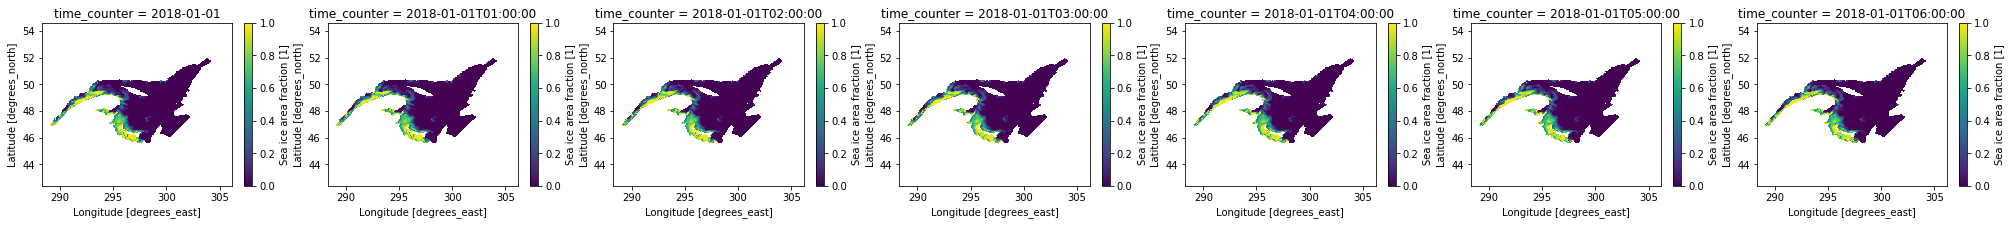

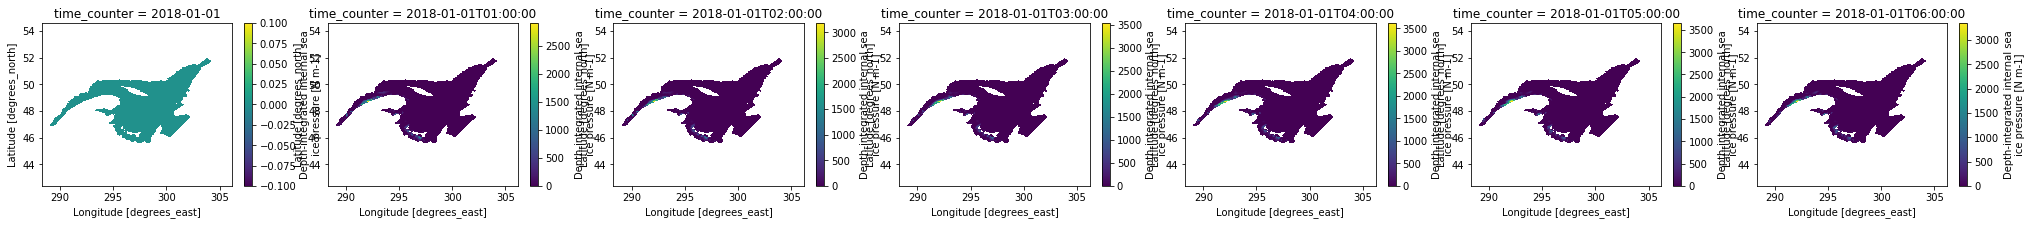

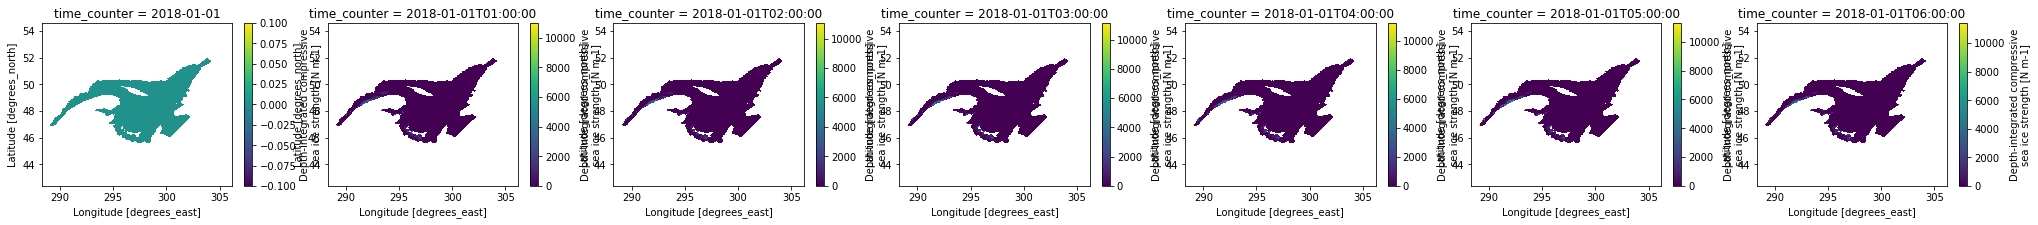

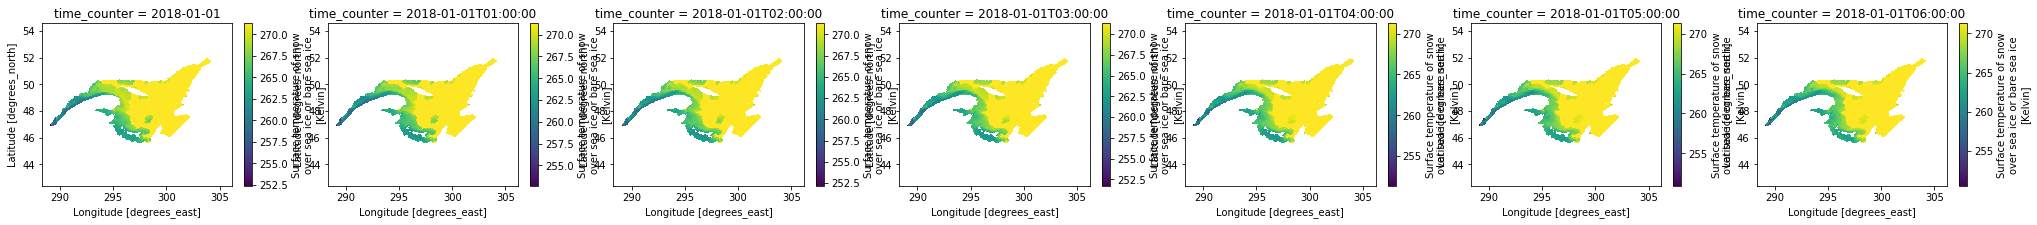

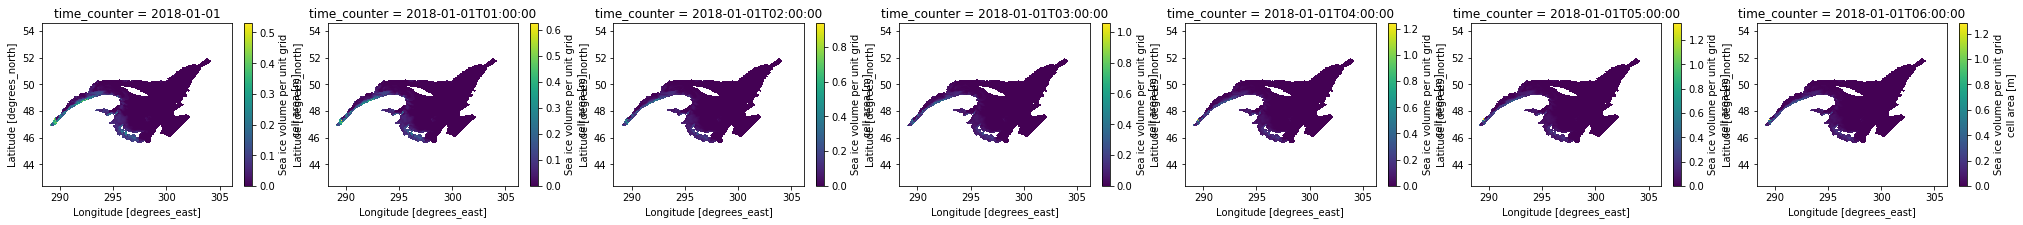

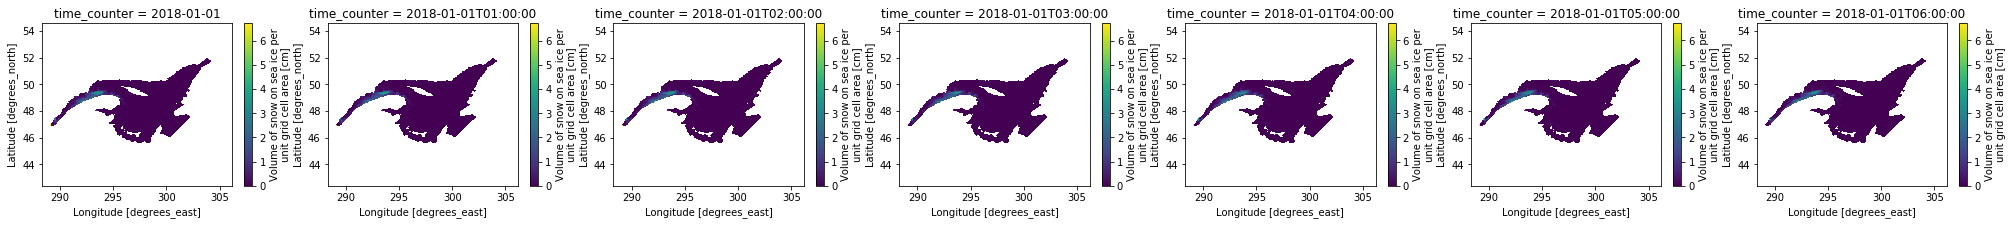

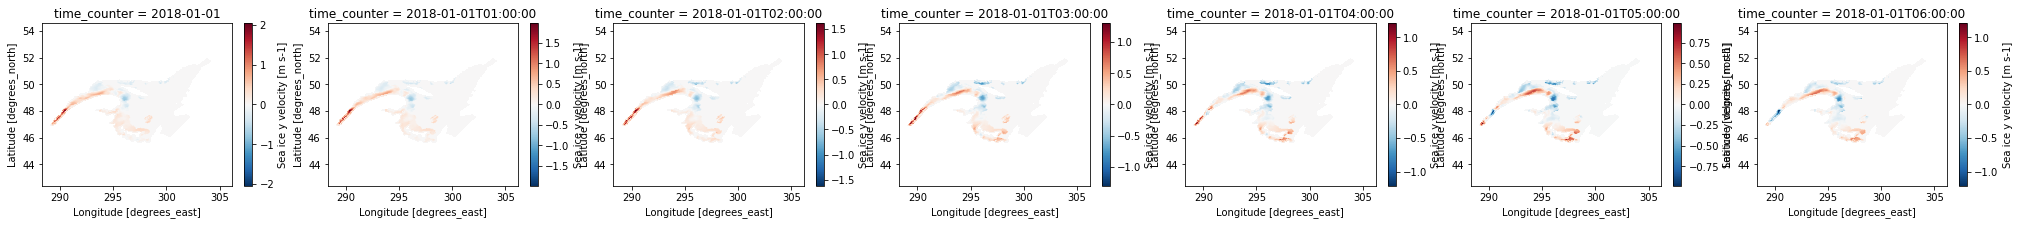

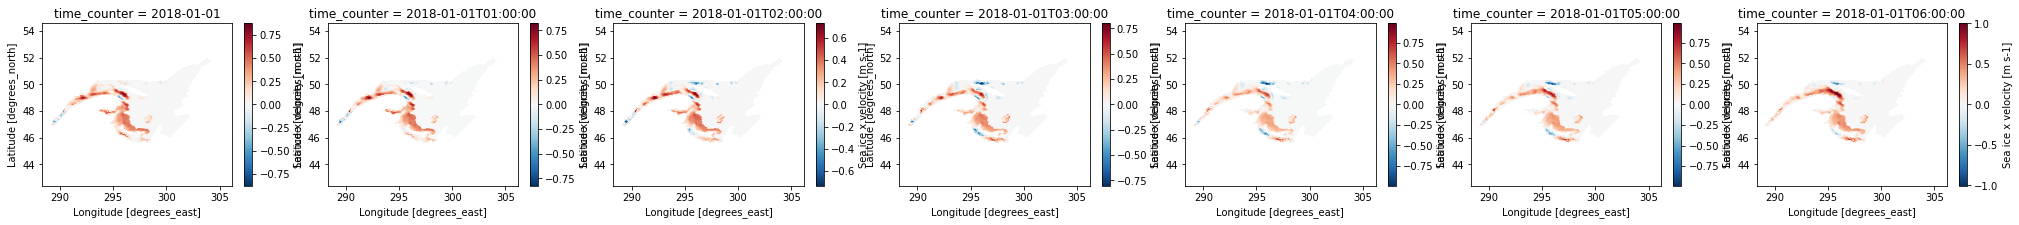

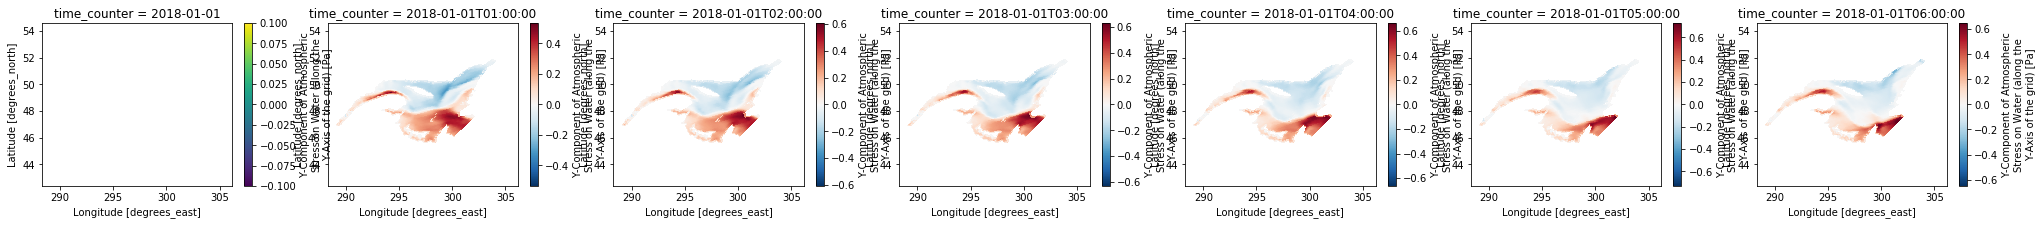

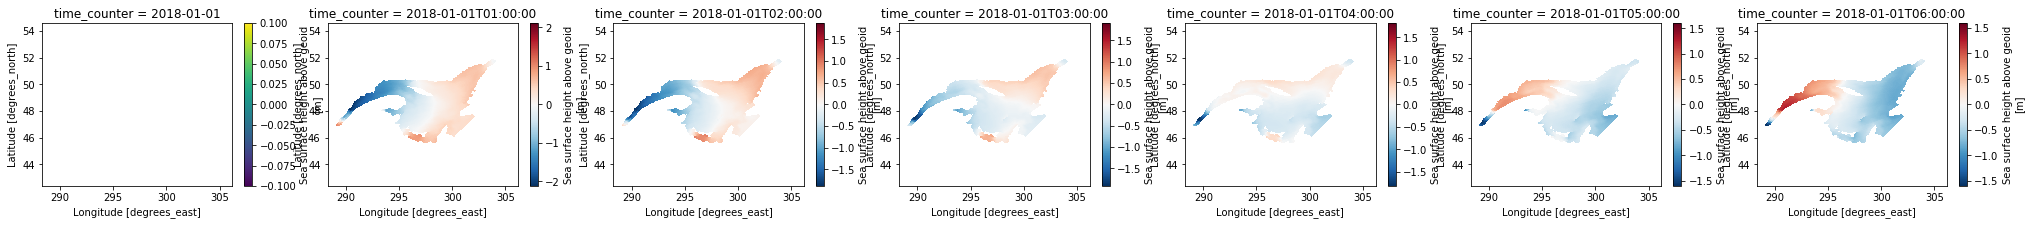

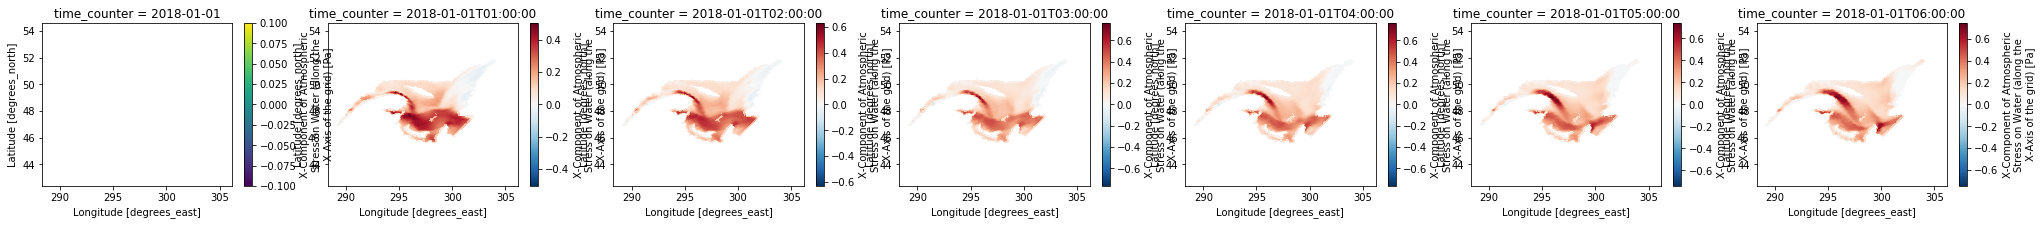

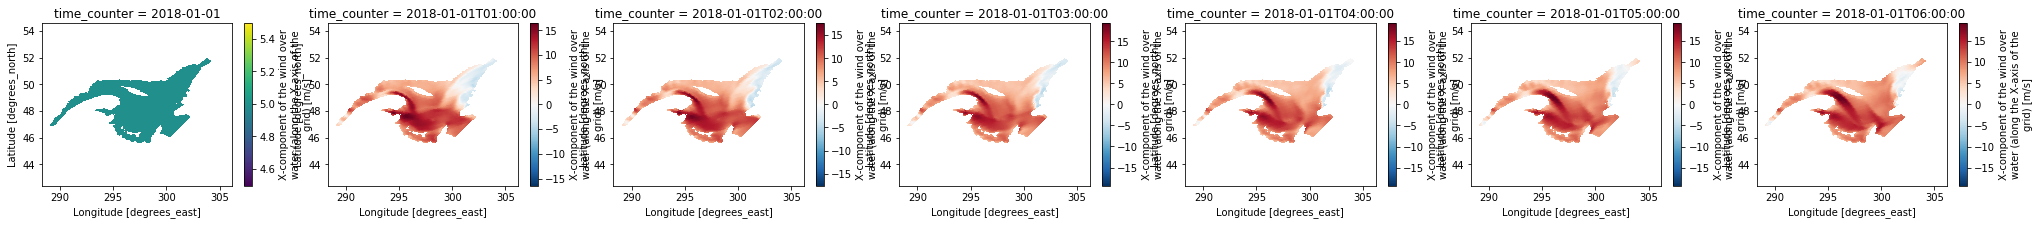

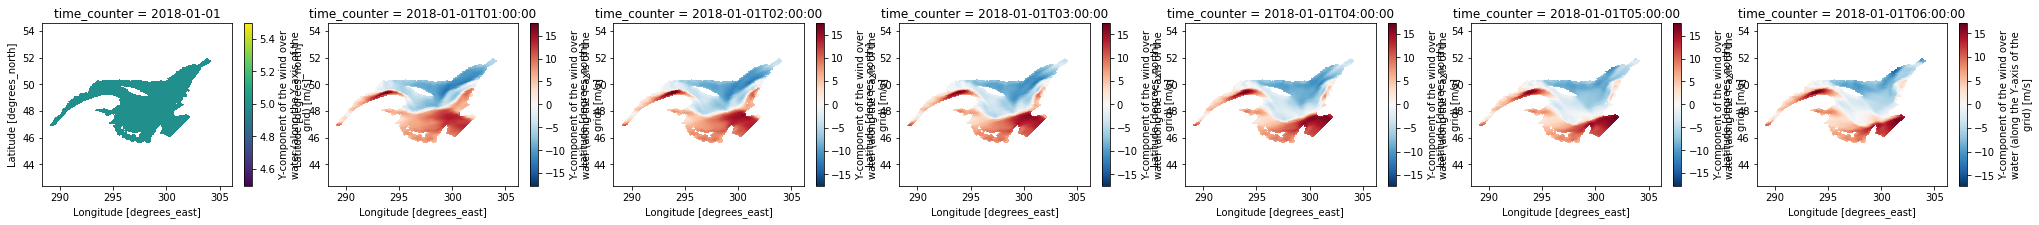

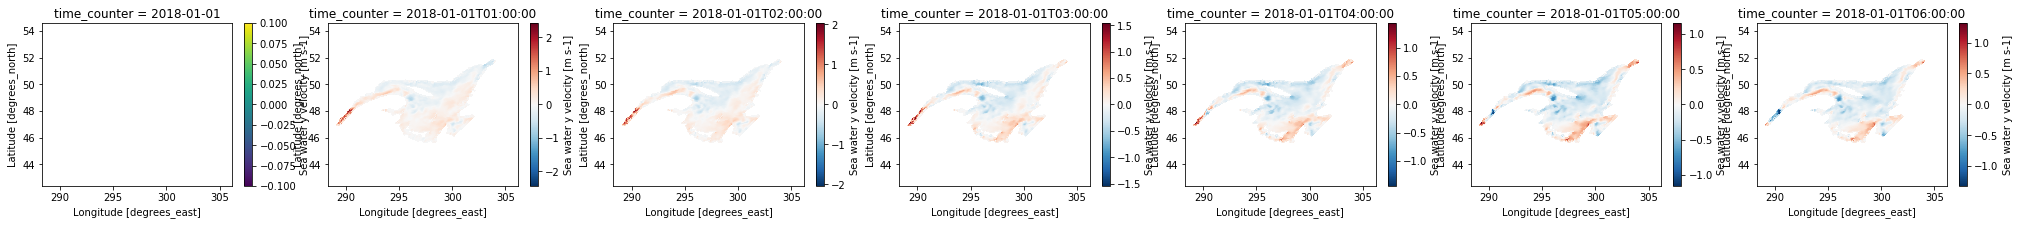

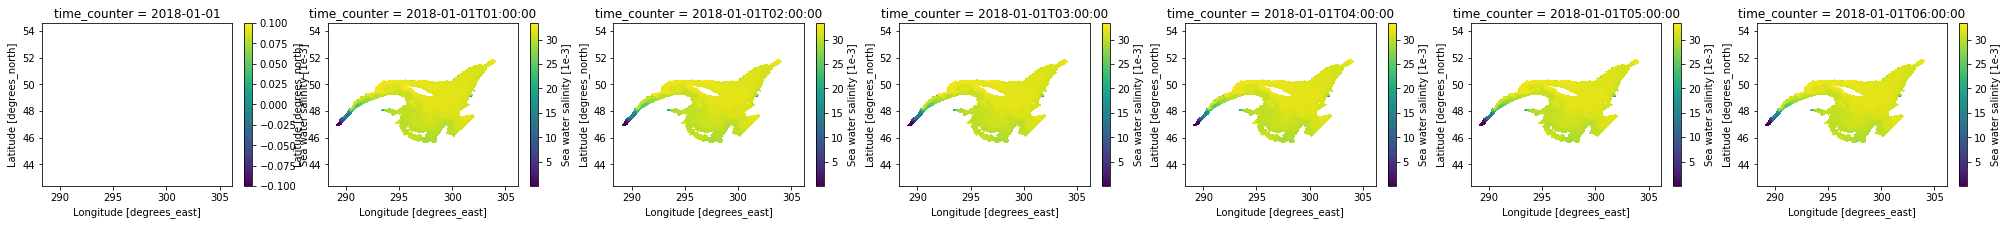

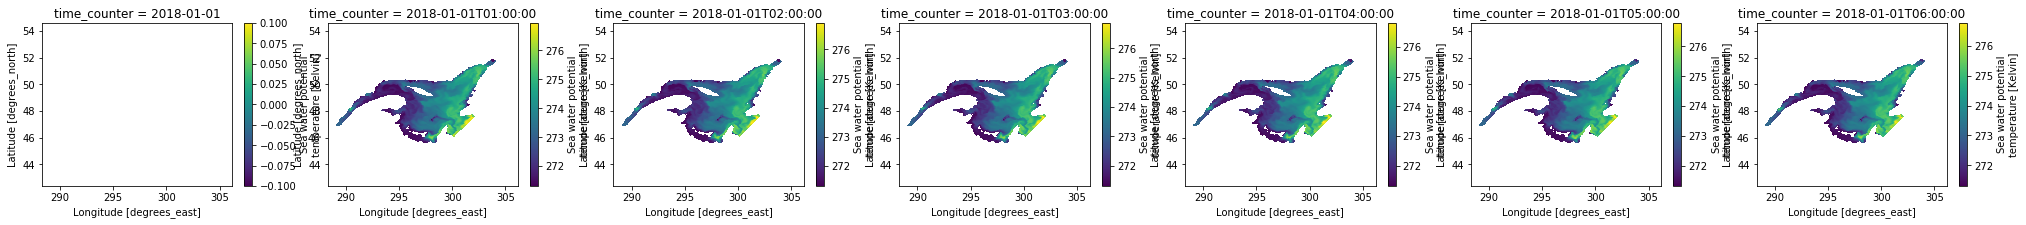

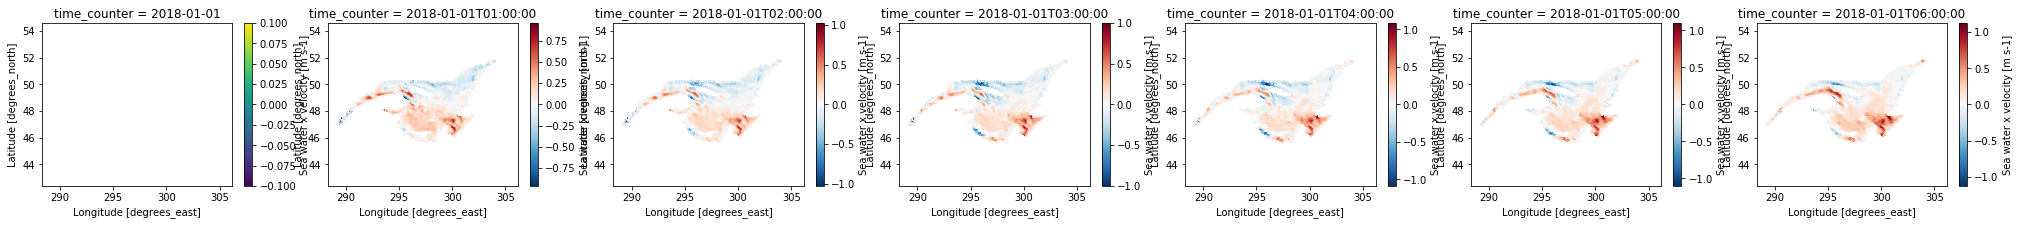

In [4]:

for var in d2D.data_vars:
    fig, axc = plt.subplots(1,len(d2D.time_counter.values), figsize=(35,3))
    for t, ax in zip(d2D.time_counter.values, axc):
        d2D[var].sel(time_counter=t).plot(ax=ax,x='nav_lon', y='nav_lat')

There is something very odd about the 000 files (first column). Some of the variables have 0 or spatially uniform values or seem to be masked. This is puzzling given the that next output time has sensible data.

The issue occurs for the following variables:
* iicepressure
* iicestrength
* sometauy
* sossheig
* sozotaux
* u_wind
* v_wind
* vomecrty
* vosaline
* votemper
* vozocrtx

The 000 file is an initial condition so maybe this issue is related to the ice insertion/data assimulation. Certainly most of the variables listed above should come from a nemo restart file upon initialization (although maybe not the iicepressure/iicestrength). Perhaps the 000 files reflect initial conditions for non-restart variables??

I wonder if this issue exists in the RPN files as well. Something to check on...

# 3D 

In [5]:
d3D = xr.open_mfdataset(files3D)
d3D

<xarray.Dataset>
Dimensions:       (depth: 77, time_counter: 1, x: 149, y: 236)
Coordinates:
  * depth         (depth) float32 0.625 1.875 3.125 4.375 ... 490.0 510.0 530.0
    nav_lat       (y, x) float32 dask.array<shape=(236, 149), chunksize=(236, 149)>
    nav_lon       (y, x) float32 dask.array<shape=(236, 149), chunksize=(236, 149)>
  * time_counter  (time_counter) datetime64[ns] 2018-01-01T06:00:00
Dimensions without coordinates: x, y
Data variables:
    vomecrty      (time_counter, depth, y, x) float32 dask.array<shape=(1, 77, 236, 149), chunksize=(1, 77, 236, 149)>
    vosaline      (time_counter, depth, y, x) float32 dask.array<shape=(1, 77, 236, 149), chunksize=(1, 77, 236, 149)>
    votemper      (time_counter, depth, y, x) float32 dask.array<shape=(1, 77, 236, 149), chunksize=(1, 77, 236, 149)>
    vozocrtx      (time_counter, depth, y, x) float32 dask.array<shape=(1, 77, 236, 149), chunksize=(1, 77, 236, 149)>
Attributes:
    source:   Regional Deterministic Prediction Sy

# Plots at first depth level

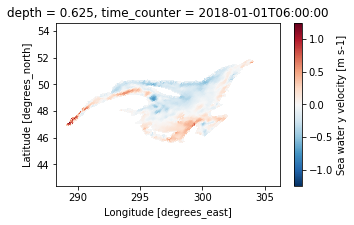

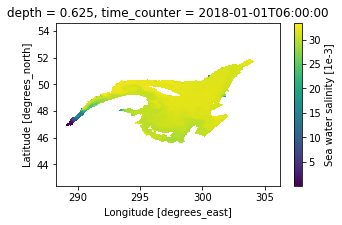

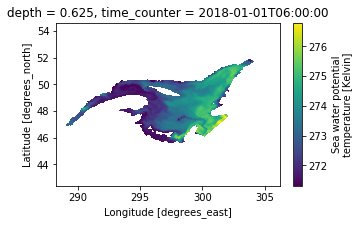

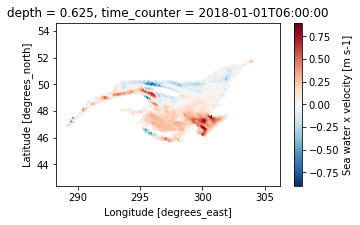

In [6]:
z=0
t=0
for var in d3D.data_vars:
    fig, ax = plt.subplots(1,len(d3D.time_counter.values), figsize=(5,3))
    d3D[var].isel(time_counter=t, depth=z).plot(ax=ax,x='nav_lon', y='nav_lat')

These look fine to me.